In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# Connect Python to MySQL

engine = create_engine(
    "mysql+pymysql://root:@localhost/airline_analytics"
)

In [4]:
# Load Route Performance Data

query_routes = """
SELECT
    origin,
    destination,
    total_flights,
    weighted_avg_arr_delay
FROM v_route_performance
WHERE total_flights > 100000
ORDER BY total_flights DESC
LIMIT 20;
"""

df_routes = pd.read_sql(query_routes, engine)
df_routes

,origin,destination,total_flights,weighted_avg_arr_delay
0,SFO,LAX,329370.0,7.49
1,LAX,SFO,328105.0,9.19
2,LAX,LAS,284494.0,7.57
3,LAS,LAX,278653.0,7.80
4,PHX,LAX,273286.0,8.11
5,LAX,PHX,272681.0,7.43
6,ORD,MSP,243470.0,7.32
7,MSP,ORD,242933.0,7.93
8,PHX,LAS,233977.0,8.35
9,LAS,PHX,232467.0,7.78


In [ ]:
# Create route label
df_routes["route"] = df_routes["origin"] + " → " + df_routes["destination"]

# Take TOP 15
top15_routes = (
    df_routes
    .sort_values("total_flights", ascending=False)
    .head(15)
)

C:\Users\MUHAMMAD ADNAN\AppData\Local\Temp\ipykernel_2684\398099289.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


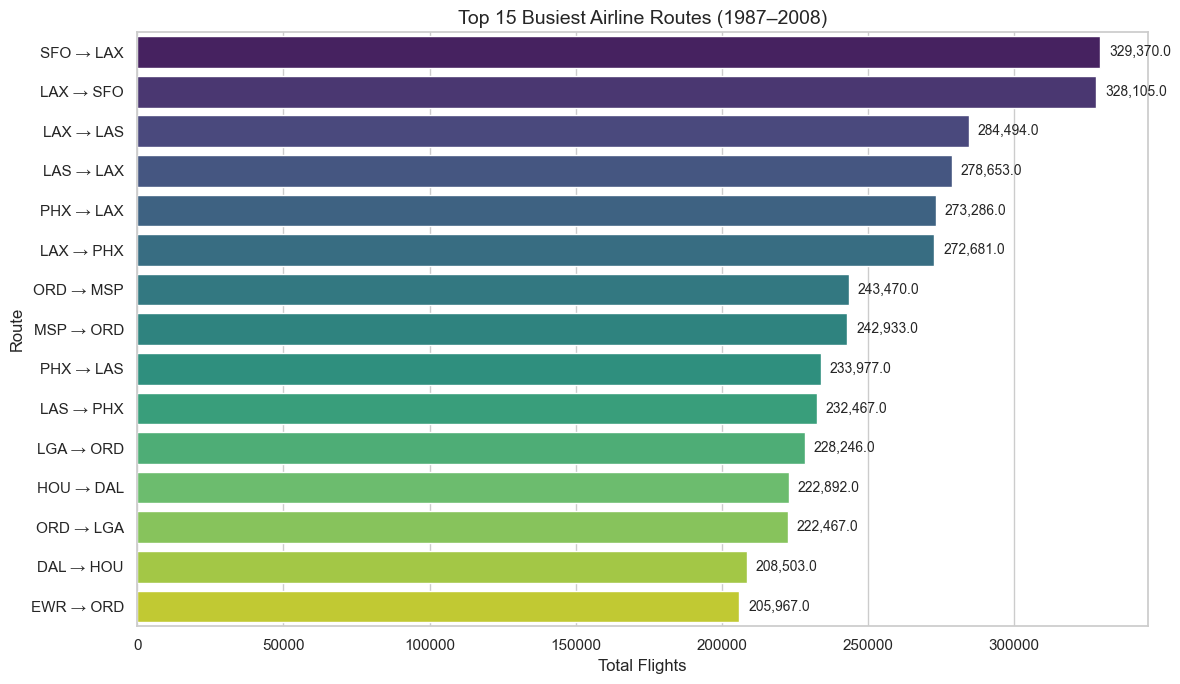

In [14]:
# Top 15 Busiest Routes

plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=top15_routes,
    x="total_flights",
    y="route",
    palette="viridis"
)

# Add labels on bars
for i, value in enumerate(top15_routes["total_flights"]):
    ax.text(
        value + 3000,      # offset to the right
        i,
        f"{value:,}",     # formatted with commas
        va="center",
        fontsize=10
    )

plt.title("Top 15 Busiest Airline Routes (1987–2008)", fontsize=14)
plt.xlabel("Total Flights")
plt.ylabel("Route")

plt.tight_layout()

plt.savefig("../visuals/route_busiest.png", dpi=300, bbox_inches="tight")

C:\Users\MUHAMMAD ADNAN\AppData\Local\Temp\ipykernel_2684\2740452160.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


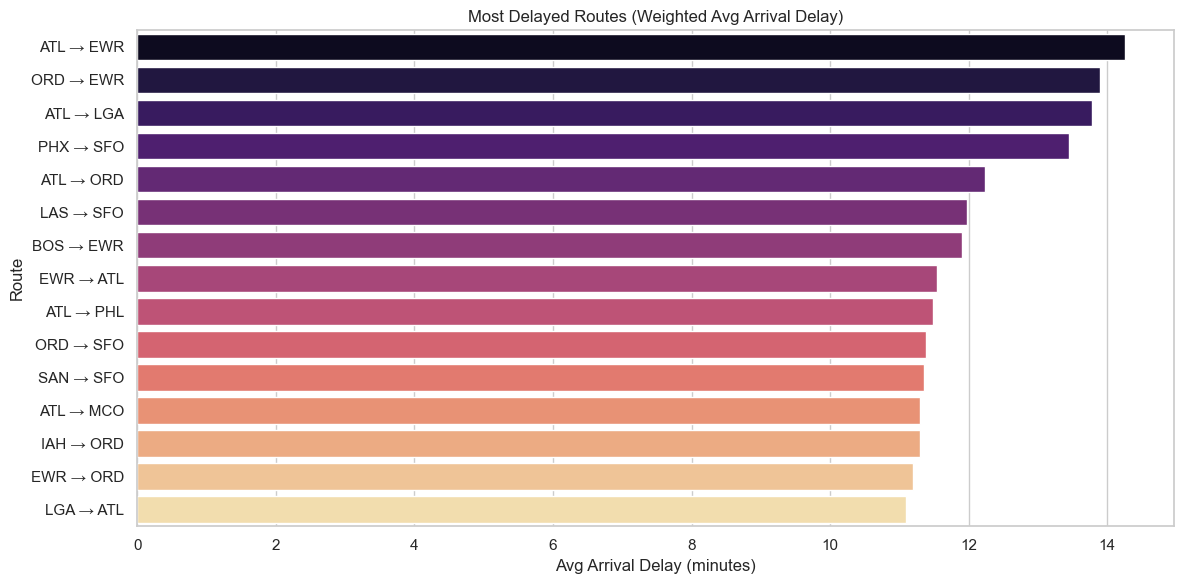

In [ ]:
# Most Delayed Routes (Weighted)

query_delayed_routes = """
SELECT
    origin,
    destination,
    total_flights,
    weighted_avg_arr_delay
FROM v_route_performance
WHERE total_flights > 100000
ORDER BY weighted_avg_arr_delay DESC
LIMIT 15;
"""

df_delayed_routes = pd.read_sql(query_delayed_routes, engine)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_delayed_routes,
    x="weighted_avg_arr_delay",
    y=df_delayed_routes["origin"] + " → " + df_delayed_routes["destination"],
    palette="magma"
)

plt.title("Most Delayed Routes (Weighted Avg Arrival Delay)")
plt.xlabel("Avg Arrival Delay (minutes)")
plt.ylabel("Route")
plt.tight_layout()

plt.savefig("../visuals/route_delays.png", dpi=300, bbox_inches="tight")

In [7]:
# Load Airport Performance Data

query_airports = """
SELECT
    airport,
    total_flights,
    weighted_avg_arr_delay,
    cancellation_rate_pct
FROM v_airport_performance
ORDER BY total_flights DESC
LIMIT 20;
"""

df_airports = pd.read_sql(query_airports, engine)
df_airports

,airport,total_flights,weighted_avg_arr_delay,cancellation_rate_pct
0,ORD,6361913.0,10.35,3.06
1,ATL,5819319.0,9.84,1.79
2,DFW,5481024.0,7.98,1.84
3,LAX,3944504.0,5.95,1.75
4,PHX,3357480.0,7.04,1.13
5,DEN,3153389.0,7.92,1.43
6,DTW,2871555.0,8.49,2.31
7,IAH,2759387.0,5.96,1.08
8,MSP,2667612.0,7.00,2.07
9,STL,2664152.0,6.61,1.82


C:\Users\MUHAMMAD ADNAN\AppData\Local\Temp\ipykernel_2684\2719858385.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


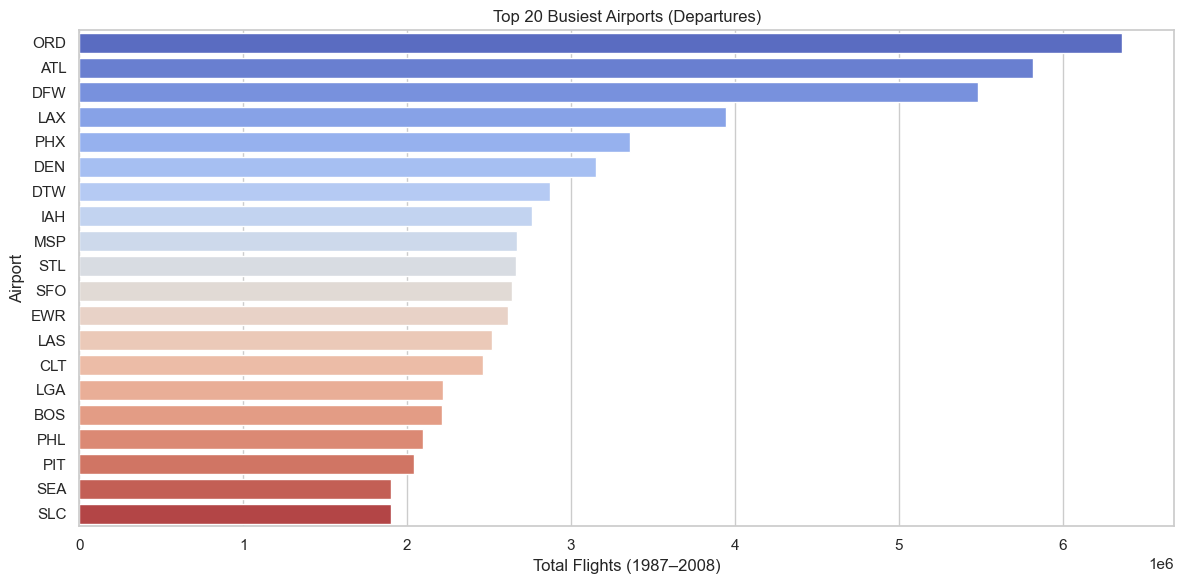

In [12]:
# Busiest Airports (Departures)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_airports,
    x="total_flights",
    y="airport",
    palette="coolwarm"
)

plt.title("Top 20 Busiest Airports (Departures)")
plt.xlabel("Total Flights (1987–2008)")
plt.ylabel("Airport")
plt.tight_layout()

plt.savefig("../visuals/airport_busiest.png", dpi=300, bbox_inches="tight")

C:\Users\MUHAMMAD ADNAN\AppData\Local\Temp\ipykernel_2684\68422510.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


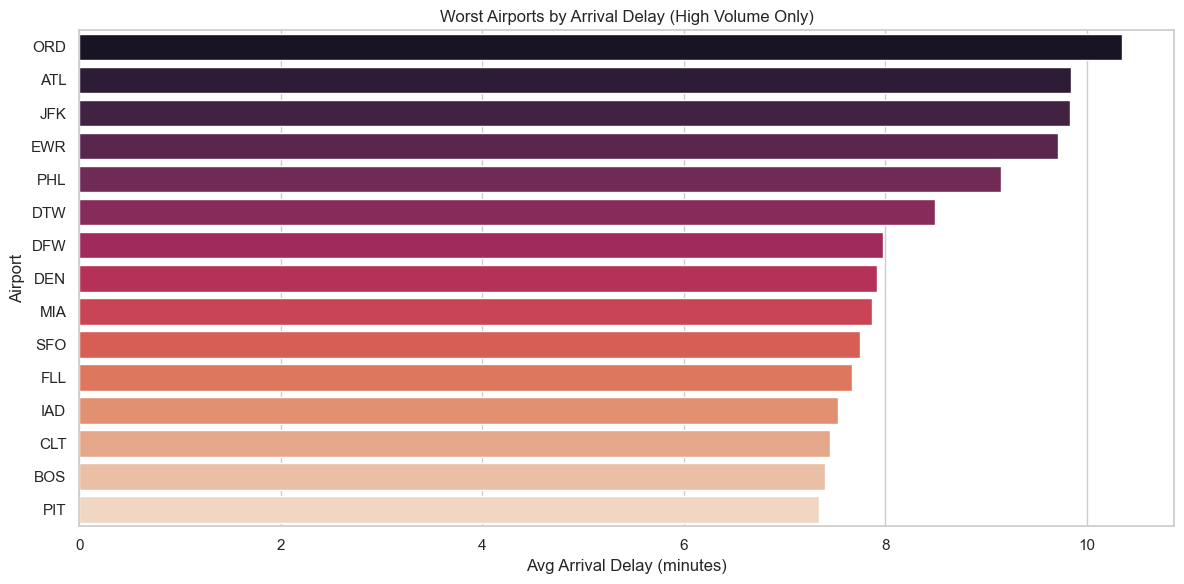

In [ ]:
# Worst Airports by Arrival Delay

query_worst_airports = """
SELECT
    airport,
    weighted_avg_arr_delay,
    total_flights
FROM v_airport_performance
WHERE total_flights > 500000
ORDER BY weighted_avg_arr_delay DESC
LIMIT 15;
"""

df_worst_airports = pd.read_sql(query_worst_airports, engine)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_worst_airports,
    x="weighted_avg_arr_delay",
    y="airport",
    palette="rocket"
)

plt.title("Worst Airports by Arrival Delay (High Volume Only)")
plt.xlabel("Avg Arrival Delay (minutes)")
plt.ylabel("Airport")
plt.tight_layout()

plt.savefig("../visuals/airport_delays.png", dpi=300, bbox_inches="tight")